# Problem 1

A strobogrammatic number is a number that looks the same when rotated ﻿180180﻿ degrees (i.e., upside down). For instance, 8 stays the same after rotating ﻿180180﻿ degrees; therefore, it is a strobogrammatic number. Here, we will define 1 as a strobogrammatic number, though this will depend on the font used.



Before coming up with ways to approach this problem, we first have to understand the problem and precisely what strobogrammatic numbers are. From the instructions, we understood that they are numbers, when rotated 180, still look the same. Therefore, we note that when we say numbers, we do not mean mathematically or used in a mathematical functionally but rather as pictures that, when turned upside down, still look the same. Before coming up with a coding technique for solving this problem, we can think of different ways how to solve it.



**Iterative approach**

In an iterative algorithm, we solve consecutive subproblems until there are no subproblems left, and we construct the overall solution to the original problem. An interactive approach to solving our problem is dividing it into smaller subproblems, and trying to solve them. First, we can define a list of subogramatic 2-digits pairs which are (1 and 1, 8 and 8, 6 and 9, 9 and 6, and 0 and 0). The second subproble is that for each number we can check if their outermost digits are strobogrammatic pairs(meaning are those numbers in the pair that we created). The third subproblem, if there is no middle number between those two digits, then we determine true or false for being strobogrammatic. However, if they are middle number we start to compare first second with the second from the lest if they are part of the pairs list. If not, then we default False, but if yes it is strobogrammatic. We can continue the comparison if we have more middle numbers, but if after that there is only one digit we just check if the digit is on the list. 



**Recursive approach**

We know that for a recursive algorithm, we call the same function repeatedly on smaller inputs until we hit the smallest subproblem(base case) whose solution is somewhat straightforwards. For this problem, we need to reduce the original problem into a smaller one so we are sure how to solve it. An approach can be to first find if the input(the number) is rotatable. In this case, we consider a number to be rotatable; if and only if, when it rotates to 180 it is still a valid digit. This can be considered our base case or the subproblem because if the rotated number contains other numbers or is not valid, we can say that it is not a strobogrammatic number. After this, the solution is straightforward because if the rotated number is valid, we just need to check if its rotation is the same as the number we imputed. This approach can be taken to determine if a number given is strobogrammatic or note and will provide outputs as false or true.



In [1]:
import collections #list-like container with fast appends and pops on either end

def strobogrammatic_iterative(n):
    '''
    Return all the strobogrammatic numbers that are of length n through iterative
    approach
    ------------
    Parameters:
    n: int
        The targeted length of the digit 
    ------------
    Returns: list
        All strobogrammatic numbers that are of the targeted length
    '''   
    if n == 1: return ['0', '1', '8']
    if n < 0:
        return ("Please put positive integers value")
    if type(n) != int: 
        return("Please input an integer value.")
    # initialziation
    mapping = {"0":"0", "1":"1", "8":"8", "6":"9", "9":"6"}
    #create a deque with collections
    result = collections.deque([])
    #if n is odd append to the results
    if n % 2 != 0:   
        result.append("1")
        result.append("0")
        result.append("8")
    else:
        result.append("")
    #create res variable to store the strobogrammatic numbers
    res = []
    while result:
        #use popleft to remove the element on the left end
        cur_num = result.popleft()
        if len(cur_num) == n:
            if cur_num[0] != '0':
                #if condition is not '0' append to the res
                res.append(cur_num)
        else:
            #when the cur_num is not of length n iterate over the items in mapping and append to the res
            for k, v in mapping.items():
                result.append(k + cur_num + v)
    return sorted(res) #sort the returned list

def strobogrammatic_recursive(n):
    '''
    Return all the strobogrammatic numbers that are of length n through recursive
    approach
    ------------
    Parameters:
    n: int
        The targeted length of the digit 
    ------------
    Returns: list
        All strobogrammatic numbers that are of the targeted length
    '''
    #defining the base case(subproblem)
    def base_case(n, length):
        #create step counter
        step_counter = 0  
        #check for specific cases, e.g. if n is 0 or n is 1
        if n == 0: 
            step_counter += 1
            return ([""], step_counter)
        if n < 0:
            return ("Please put positive integers value")
        if type(n) != int: 
            return("Please input an integer value.")
        if n == 1: 
            step_counter += 1
            return (["1", "0", "8"], step_counter)
        
        #recall base_case function with the n parameter changed
        middle_numbers = base_case(n - 2, length)
        step_counter += int(middle_numbers[1])
        step_counter += 1
        result = []
        
        #iterate over the returned list from the base_case
        for middle in middle_numbers[0]:
            if n != length:           
                result.append("0" + middle + "0")
            
                step_counter += 1 
            #append to the results, each element in middle_numbers with other strobogrammatic numbers
            result.append("1" + middle + "1")
            step_counter += 1
            result.append("6" + middle + "9")
            step_counter += 1
            result.append("8" + middle + "8")
            step_counter += 1
            result.append("9" + middle + "6")
            
        return (result, step_counter)
    
    result = base_case(n, n)
    return sorted(result[0]) #sort the returned list 

In [2]:
#3 test cases same for both algorithms
print(strobogrammatic_iterative(1))
print(strobogrammatic_iterative(1))
print(strobogrammatic_iterative(4))

#other test cases
print(strobogrammatic_iterative(-5))
print(strobogrammatic_iterative(10.7))


['0', '1', '8']
['0', '1', '8']
['1001', '1111', '1691', '1881', '1961', '6009', '6119', '6699', '6889', '6969', '8008', '8118', '8698', '8888', '8968', '9006', '9116', '9696', '9886', '9966']
Please put positive integers value
Please input an integer value.


In [3]:
###Test cases for recursive approach

#3 test cases same for both algorithms
print(strobogrammatic_recursive(0))
print(strobogrammatic_recursive(1))
print(strobogrammatic_recursive(4))

#other test cases, we wont print those due to kernel, but if we print, it
print(strobogrammatic_recursive(-5))
print(strobogrammatic_recursive(10.7))

['']
['0', '1', '8']
['1001', '1111', '1691', '1881', '1961', '6009', '6119', '6699', '6889', '6969', '8008', '8118', '8698', '8888', '8968', '9006', '9116', '9696', '9886', '9966']
['P']
['P']


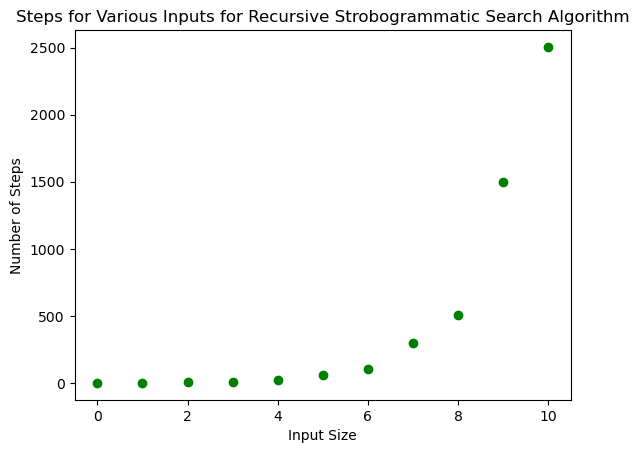

In [1]:
### Plotting the number of steps per n input for the recursive approach
import matplotlib.pyplot as plt

def strobogrammatic_recursive(n):
    def base_case(n, length):
        step_counter = 0  
        if n == 0: 
            step_counter += 1
            return ([""], step_counter)
        if n == 1: 
            step_counter += 1
            return (["1", "0", "8"], step_counter)
           
        middle_numbers = base_case(n - 2, length)
        step_counter += int(middle_numbers[1])
        step_counter += 1
        result = []
           
        for middle in middle_numbers[0]:
            if n != length:           
                result.append("0" + middle + "0")
                step_counter += 1 
            result.append("1" + middle + "1")
            step_counter += 1
            result.append("6" + middle + "9")
            step_counter += 1
            result.append("8" + middle + "8")
            step_counter += 1
            result.append("9" + middle + "6")
        return (result, step_counter)    
    return base_case(n, n) #defining the base case(subproblem)
result = []
n = [0,1,2,3,4,5,6,7,8,9,10]
for i in n:
    result.append(strobogrammatic_recursive(i)[1])


plt.scatter(y=result, x=n, color="green", label = "Strobogrammatic Search Algorithm")
plt.title('Steps for Various Inputs for Recursive Strobogrammatic Search Algorithm')
plt.xlabel('Input Size')
plt.ylabel('Number of Steps')
plt.show()

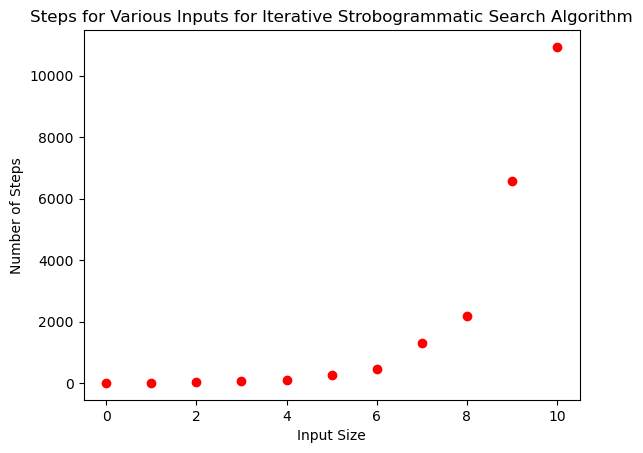

In [2]:
### Plotting the number of steps per n input for the iterative approach
import matplotlib.pyplot as plt
import collections

def strobogrammatic_iterative(n):
    '''
    Return all the strobogrammatic numbers that are of length n through recursive
    approach
    ------------
    Parameters:
    n: int
        The targeted length of the digit 
    ------------
    Returns: list
        All strobogrammatic numbers that are of the targeted length
    '''   
    steps = 0
    if n == 1: 
        steps += 1 
        return ['0', '1', '8']
    # initialziation
    mapping = {"0":"0", "1":"1", "8":"8", "6":"9", "9":"6"}
    result = collections.deque([])
    steps += 1 
    if n % 2 != 0:  
        steps += 1
        result.append("1")
        #steps += 1
        result.append("0")
        steps += 1
        result.append("8")
        steps += 1
    else:
        result.append("")
        steps += 1
    res = []
    while result:
        cur_num = result.popleft()
        steps += 1
        if len(cur_num) == n:
            steps += 1
            res.append(cur_num)
        else:
            for k, v in mapping.items():
                result.append(k + cur_num + v)
                steps += 1
    return (sorted(res), steps)

res = []
n = [0,1,2,3,4,5,6,7,8,9,10]
for i in n:
    res.append(strobogrammatic_iterative(i)[1])

plt.scatter(y=res, x=n, color="red")
plt.title('Steps for Various Inputs for Iterative Strobogrammatic Search Algorithm')
plt.xlabel('Input Size')
plt.ylabel('Number of Steps')
plt.show()

In [ ]:
### Plotting the running time for n input for the iterative approach
def rt_experiment_rec1(n):
    '''
    Code adapted from class 2.2 breakout rooms
    Plot a graph depicting the average run time compared to input size  
    '''

    #import necessary modules to plot and calc the running time
    import time 
    import matplotlib.pyplot as plt

    # initalize an array to serve as the list of values of runtimes 
    avg_runtime = [] 
 
    #n_list = list(range(1, max_input))
    experiments = n
    # initialize the list of runtimes 
    runtime = []
    #inp = [i for i in range(input_size)]
    for i in range(1, experiments):
        start_timer = time.process_time()
        # run the strobogrammatic recursive search function 
        strobogrammatic_iterative(i)
        # add the amount of time it took to the list of runtimes for this input size
        runtime.append(time.process_time()-start_timer)
        # average those runtimes together and add them to the avg runtime list 
        avg_runtime.append(sum(runtime)/len(runtime))
    
    
    # use matplotlib to plot the data 
    plt.scatter(y=runtime, x=range(1, len(runtime) +1), color="red")
    plt.title('Average Runtimes for Various Inputs for Iterative Strobogrammatic Search Algorithm')
    plt.xlabel('Input Size')
    plt.ylabel('Average Runtime (seconds)')
    plt.show()
    
rt_experiment_rec1(20)

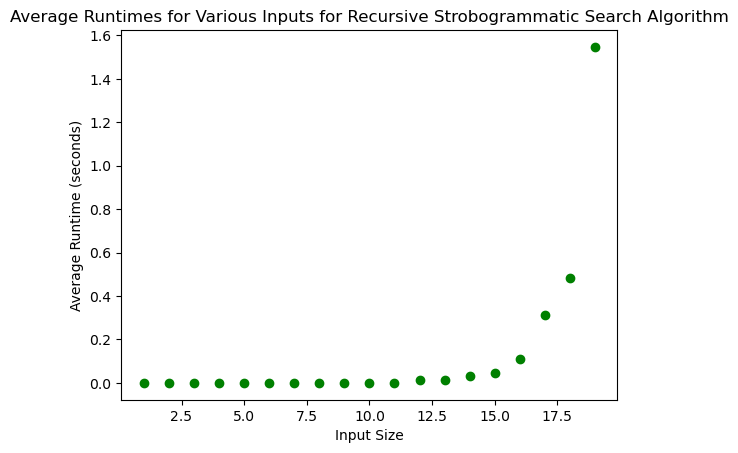

In [4]:
### Plotting the running time for n input for the recursive approach
def rt_experiment_rec2(n):
    '''
    adapted from class 2.2 code
    program to plot a graph depicting the average run time compared to input size  
    '''

    #import necessary modules to plot and calc the running time
    import time 
    import matplotlib.pyplot as plt

    # initalize an array to serve as the list of values of runtimes 
    avg_runtime = [] 
 
    #n_list = list(range(1, max_input))
    experiments = n
    # initialize the list of runtimes 
    runtime = []
    #inp = [i for i in range(input_size)]
    for i in range(1, experiments):
        start_timer = time.process_time()
        # run the strobogrammatic recursive search function 
        strobogrammatic_recursive(i)
        # add the amount of time it took to the list of runtimes for this input size
        runtime.append(time.process_time()-start_timer)
        # average those runtimes together and add them to the avg runtime list 
        avg_runtime.append(sum(runtime)/len(runtime))
    
    
    # use matplotlib to plot the data 
    plt.scatter(y=runtime, x=range(1, len(runtime) +1), color="green")
    plt.title('Average Runtimes for Various Inputs for Recursive Strobogrammatic Search Algorithm')
    plt.xlabel('Input Size')
    plt.ylabel('Average Runtime (seconds)')
    plt.show()
    
rt_experiment_rec2(20)